# 1. Assignment

## Portfolio Management
### MLP Training

#### January 2025

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

***

# 1. Risk

### 1. 
Suppose you are a large asset manager, running many strategies.

A new strategy is proposed for your investment. Which performance metrics would be most influential to you as you decide on an allocation?

- Correlation between the new strategy and my current strategies
- Sharpe ratio of the new strategy
- Expected Return of the strategys
- Skewness (is it positive or negative? Does this behavior align with my current strategy?)


### 2.
Consider the data in `data/assignment_1_data.xlsx`. For each stock, calculate the (annualized)
* mean
* vol
* sharpe

Calculate those same statistics for...
* equally-weighted portfolio of the stocks
* equallly-weighted portfolio excluding `XOM`.


In [31]:
import pandas as pd
import numpy as np

path = '../data/assignment_1_data.xlsx'
sec_df = pd.read_excel(path).set_index('ticker')
xret_df = pd.read_excel(path, 'excess returns').set_index('date')
spy_df = pd.read_excel(path, 'spy').set_index('date')
SCALE = 52

display(xret_df.head())
display(spy_df.head())


,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,XOM
date,,,,,,,
2015-01-09,0.010989,-0.004322,-0.051051,-0.022830,-0.067966,-0.071202,-0.021381
2015-01-16,-0.063909,-0.030319,-0.031068,-0.009144,0.009286,-0.075949,-0.020829
2015-01-23,0.064384,0.018769,0.072872,0.036004,0.060103,0.041017,-0.004083
2015-01-30,0.025008,-0.155696,0.122909,-0.084799,-0.020083,-0.000515,-0.050170
2015-02-06,0.041844,0.072475,0.078461,0.084980,0.015870,0.090312,0.077273


,SPY
date,
2015-01-09,-0.019261
2015-01-16,-0.023016
2015-01-23,0.015006
2015-01-30,-0.038922
2015-02-06,0.053308


## Mean Xret

In [9]:
mean_xret = xret_df.mean() * SCALE
display(mean_xret)

AAPL     0.264010
MSFT     0.273016
AMZN     0.302677
NVDA     0.678099
GOOGL    0.232592
TSLA     0.452013
XOM      0.094151
dtype: float64

## Vol

In [10]:
vol = xret_df.std() * np.sqrt(SCALE)
display(vol)

AAPL     0.281820
MSFT     0.245809
AMZN     0.308214
NVDA     0.456552
GOOGL    0.287975
TSLA     0.584168
XOM      0.296208
dtype: float64

## Sharpe Ratio

In [11]:
sharpe_ratio = mean_xret / vol
display(sharpe_ratio)

AAPL     0.936802
MSFT     1.110681
AMZN     0.982034
NVDA     1.485262
GOOGL    0.807680
TSLA     0.773773
XOM      0.317856
dtype: float64

# Portfolio Of Securities

In [17]:
xret_df

,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,XOM
date,,,,,,,
2015-01-09,0.010989,-0.004322,-0.051051,-0.022830,-0.067966,-0.071202,-0.021381
2015-01-16,-0.063909,-0.030319,-0.031068,-0.009144,0.009286,-0.075949,-0.020829
2015-01-23,0.064384,0.018769,0.072872,0.036004,0.060103,0.041017,-0.004083
2015-01-30,0.025008,-0.155696,0.122909,-0.084799,-0.020083,-0.000515,-0.050170
2015-02-06,0.041844,0.072475,0.078461,0.084980,0.015870,0.090312,0.077273
...,...,...,...,...,...,...,...
2024-06-14,0.061481,0.026416,-0.021223,0.073266,-0.003232,-0.014764,-0.050034
2024-06-21,-0.020888,0.018934,0.032153,-0.037622,0.018707,0.030731,0.017765
2024-06-28,0.022505,0.001128,0.029474,-0.016520,0.021448,0.088672,0.046784


## Equally weigh excess returns

In [33]:
n = sec_df.shape[0]
WEIGHT = 1 / n

position = pd.DataFrame(data=[WEIGHT] * n, index=sec_df.index)
port_dly_xret_df = xret_df.dot(position).rename(columns={0:'port return'})
display(port_dly_xret_df)

,port return
date,
2015-01-09,-0.032538
2015-01-16,-0.031705
2015-01-23,0.041295
2015-01-30,-0.023335
2015-02-06,0.065888
...,...
2024-06-14,0.010273
2024-06-21,0.008540
2024-06-28,0.027641


In [38]:
n = sec_df.shape[0]
WEIGHT = 1 / n

position = pd.DataFrame(data=[WEIGHT] * n, index=sec_df.index)

port_xret_df = xret_df.dot(position).rename(columns={0:'port return'})
display(port_xret_df)

port_mean_xret = port_xret_df.mean() * SCALE
port_mean_xret.name = 'port mean xret'
display(port_mean_xret)

port_vol = port_xret_df.std() * np.sqrt(SCALE)
port_vol.name = 'port vol'
display(port_vol)

port_sharpe_ratio = port_mean_xret / port_vol
port_sharpe_ratio.name = 'port sharpe ratio'
display(port_sharpe_ratio)

,port return
date,
2015-01-09,-0.032538
2015-01-16,-0.031705
2015-01-23,0.041295
2015-01-30,-0.023335
2015-02-06,0.065888
...,...
2024-06-14,0.010273
2024-06-21,0.008540
2024-06-28,0.027641


port return    0.32808
Name: port mean xret, dtype: float64

port return    0.253437
Name: port vol, dtype: float64

port return    1.294523
Name: port sharpe ratio, dtype: float64

## Without Exxon Mobil

In [39]:

n = sec_df.shape[0] - 1
WEIGHT = 1 / n

xret_ex_xom_df = xret_df.drop('XOM', axis=1)
position = pd.DataFrame(data=[WEIGHT] * n, index=sec_df.drop('XOM', axis=0).index)

port_ex_xom_dly_xret_df = xret_ex_xom_df.dot(position).rename(columns={0:'port return'})
display(port_ex_xom_dly_xret_df)

port_mean_xret = port_ex_xom_dly_xret_df.mean() * SCALE
port_mean_xret.name = 'port mean xret'
display(port_mean_xret)

port_vol = port_ex_xom_dly_xret_df.std() * np.sqrt(SCALE)
port_vol.name = 'port vol'
display(port_vol)

port_sharpe_ratio = port_mean_xret / port_vol
port_sharpe_ratio.name = 'port sharpe ratio'
display(port_sharpe_ratio)

,port return
date,
2015-01-09,-0.034397
2015-01-16,-0.033517
2015-01-23,0.048858
2015-01-30,-0.018863
2015-02-06,0.063990
...,...
2024-06-14,0.020324
2024-06-21,0.007002
2024-06-28,0.024451


port return    0.367068
Name: port mean xret, dtype: float64

port return    0.276539
Name: port vol, dtype: float64

port return    1.327365
Name: port sharpe ratio, dtype: float64



### 3.
Use the data in `data/multi_asset_etf_data.xlsx`. Make scatter plots where in each plot the vertical axis displays mean return. The horizontal axis displays different measures of risk...
* volatility
* skewness
* kurtosis
* 5th quantile return
* max drawdown

Do any of these scatterplots show strong evidence of a relationship between risk and return?

***

In [41]:
SCALE = 12
path  = '../data/multi_asset_etf_data.xlsx'

etf_df = pd.read_excel(path, 'descriptions').set_index('ticker')
xret_df = pd.read_excel(path, 'excess returns').set_index('Date')
price_df = pd.read_excel(path, 'prices').set_index('Date')
totret_df = pd.read_excel(path, 'total returns').set_index('Date')

# Calc extra data

In [57]:
mean_xret = xret_df.mean() * SCALE
vol = xret_df.std() * np.sqrt(SCALE)
skewness = xret_df.skew()
kurtosis = xret_df.kurt()

# qunatile (Value at Risk)
desired_quantile = 0.05
VaR = xret_df.quantile(desired_quantile)

# drawdown calc
cum_ret_df = (xret_df + 1).cumprod()
roll_max_df = cum_ret_df.cummax()
drawdown_df = (cum_ret_df - roll_max_df) / roll_max_df
max_drawdown = drawdown_df.min() # find the lowest number (aka negative)

# Skewness

In [58]:
display(skewness)

BWX   -0.122065
DBC   -0.479875
EEM    0.029281
EFA   -0.136630
HYG   -0.881594
IEF   -0.082709
IYR   -0.467615
PSP   -0.668878
QAI   -0.521906
SPY   -0.419043
TIP   -0.715399
dtype: float64

# Kurtosis

In [59]:
display(kurtosis)

BWX    0.528365
DBC    0.895638
EEM    0.724814
EFA    1.075567
HYG    4.761644
IEF    0.024228
IYR    1.339263
PSP    2.853289
QAI    2.081320
SPY    0.608037
TIP    3.339881
dtype: float64

# VaR (Quantile Returns of the 5th percent)

In [60]:
display(VaR)

BWX   -0.046106
DBC   -0.071014
EEM   -0.071528
EFA   -0.067825
HYG   -0.026179
IEF   -0.035802
IYR   -0.078222
PSP   -0.087930
QAI   -0.019439
SPY   -0.071896
TIP   -0.021560
Name: 0.05, dtype: float64

# Scatter Plots (Mean Ret vs. Risk Stat)
* volatility
* skewness
* kurtosis
* 5th quantile return
* max drawdown

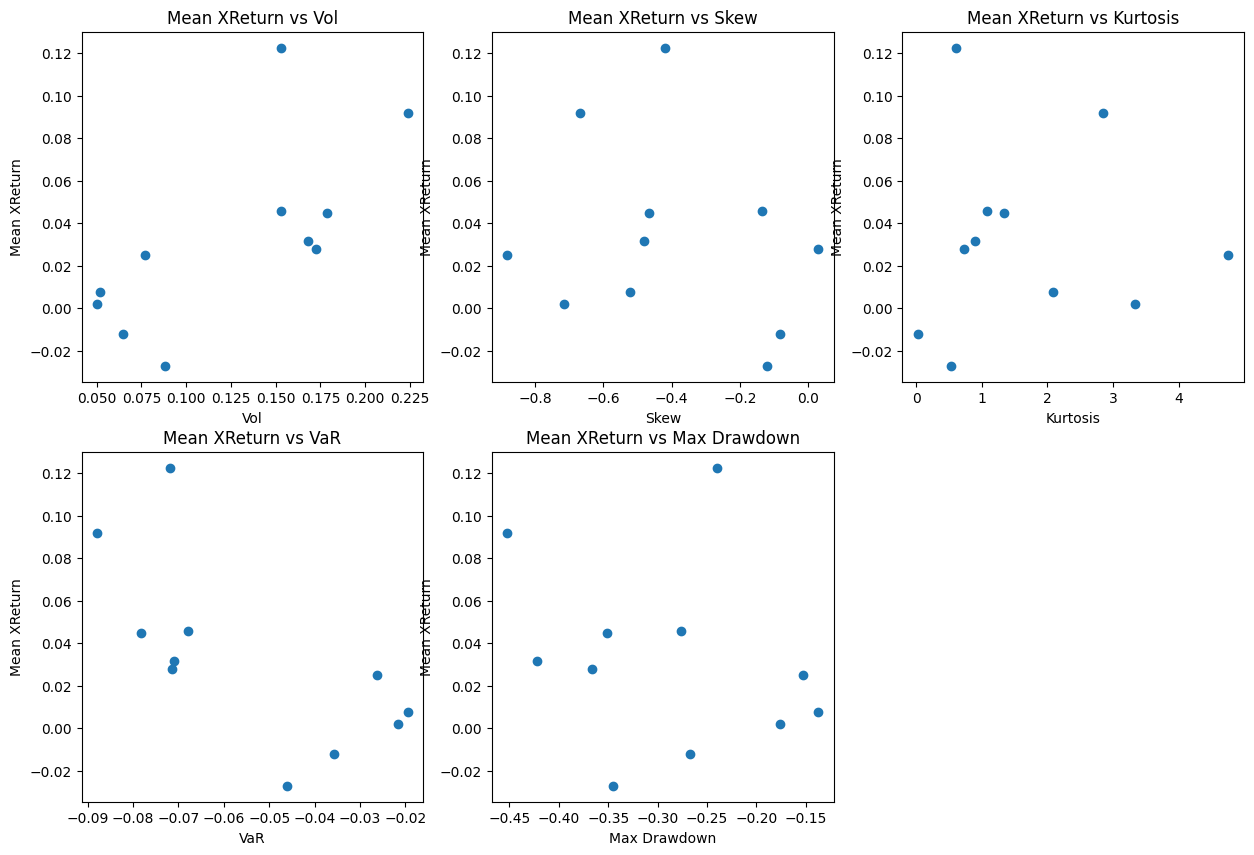

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
risk_stats = [
        ('Vol', vol),
        ('Skew', skewness),
        ('Kurtosis', kurtosis),
        ('VaR', VaR),
        ('Max Drawdown', max_drawdown)
    ]

for ax, (risk_stat, data) in zip(axes.flatten(), risk_stats):
    ax.scatter(data, mean_xret)
    ax.set_xlabel(risk_stat)
    ax.set_ylabel('Mean XReturn')
    ax.set_title(f'Mean XReturn vs {risk_stat}')

fig.delaxes(axes.flatten()[-1])
plt.tight_layout
plt.show()

# Answer

1. Mean Xret with Vol
-  In this basket of securities the more volatile securities have higher excess returns. But this doesnt generalize for all securities (we can find cases like penny stocks hat do not follow this rule)

2. Mean Xret with Skewness
- No relationship. It looks like a random scatter plot

3. Mean Xret with Kurtosis
- No Relationship. It looks like a random scatter plot

4. Mean Xret with VaR
- As the VaR increases (gets less negative), the mean excess return also decreases in this basket of securities. Because we observed that the higher excess returns have higher volatilities, it would make sense that their worst performances are more extreme.

5. Mean Xret with Max Drawdown
- No Relationship. It looks like a random scatter plot